In [5]:
#import dependencies
import pandas as pd
import matplotlib.pylot as plt
from datetime import datetime
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import os

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [6]:
#read csv's

states = "GlobalLandTemperaturesByState.csv"

In [7]:
#create dataframe

state_df = pd.read_csv(states)
state_df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [8]:
#rename columns with some more clean up

state_df = state_df.rename(columns = {
    "dt": "Date",
    "AverageTemperature": "Avg Temperature",
    "AverageTemperatureUncertainty": "Avg Temp. Uncertainty",
    "State": "State",
    "Country": "Country"
})
state_df

,Date,Avg Temperature,Avg Temp. Uncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [9]:
#start with the 5 major factory farming states:
#California, Kansas, Nebraska, Iowa, and Maryland
#California first

cali_df = state_df.loc[state_df['State'] == 'California']
cali_df.head()

,Date,Avg Temperature,Avg Temp. Uncertainty,State,Country
71058,1849-01-01,5.591,2.405,California,United States
71059,1849-02-01,6.941,2.041,California,United States
71060,1849-03-01,9.731,2.294,California,United States
71061,1849-04-01,12.294,2.861,California,United States
71062,1849-05-01,14.417,2.215,California,United States


In [10]:
cali_df.loc[state_df['State'] == 'California']

,Date,Avg Temperature,Avg Temp. Uncertainty,State,Country
71058,1849-01-01,5.591,2.405,California,United States
71059,1849-02-01,6.941,2.041,California,United States
71060,1849-03-01,9.731,2.294,California,United States
71061,1849-04-01,12.294,2.861,California,United States
71062,1849-05-01,14.417,2.215,California,United States
...,...,...,...,...,...
73030,2013-05-01,17.899,0.228,California,United States
73031,2013-06-01,22.513,0.265,California,United States
73032,2013-07-01,25.563,0.206,California,United States
73033,2013-08-01,23.460,0.369,California,United States


In [11]:
state_df['Date'] = pd.to_datetime(state_df['Date'])
cali_df = pd.to_datetime(cali_df['Date'])

In [12]:
state_df['Year'] = state_df['Date'].map(lambda x: x.strftime('%Y'))
state_df['Month'] = state_df['Date'].map(lambda x: x.strftime('%m'))
state_df.head()

,Date,Avg Temperature,Avg Temp. Uncertainty,State,Country,Year,Month
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,05
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,06
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,07
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,08
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,09


In [13]:
state_clean = state_df.dropna()
state_df = state_clean.drop(columns = ['Avg Temp. Uncertainty'])
state_df

,Date,Avg Temperature,State,Country,Year,Month
0,1855-05-01,25.544,Acre,Brazil,1855,05
1,1855-06-01,24.228,Acre,Brazil,1855,06
2,1855-07-01,24.371,Acre,Brazil,1855,07
3,1855-08-01,25.427,Acre,Brazil,1855,08
4,1855-09-01,25.675,Acre,Brazil,1855,09
...,...,...,...,...,...,...
645669,2013-04-01,15.710,Zhejiang,China,2013,04
645670,2013-05-01,21.634,Zhejiang,China,2013,05
645671,2013-06-01,24.679,Zhejiang,China,2013,06
645672,2013-07-01,29.272,Zhejiang,China,2013,07


In [18]:
cali = state_df.loc[state_df['State'] == 'California']
cali_data = cali.groupby('Year').mean()
cali_data.head()

,Avg Temperature
Year,
1940,15.141417
1941,14.230917
1942,14.208583
1943,14.673333
1944,13.758250


In [19]:
state_df['Year'] = pd.to_numeric(state_df['Year'])

In [20]:
state_df = state_df[(state_df.Year >= 1940) & (state_df.Year <= 1990)]


state_df


,Date,Avg Temperature,State,Country,Year,Month
1016,1940-01-01,26.076,Acre,Brazil,1940,01
1017,1940-02-01,26.950,Acre,Brazil,1940,02
1018,1940-03-01,26.866,Acre,Brazil,1940,03
1019,1940-04-01,26.122,Acre,Brazil,1940,04
1020,1940-05-01,26.014,Acre,Brazil,1940,05
...,...,...,...,...,...,...
645397,1990-08-01,27.982,Zhejiang,China,1990,08
645398,1990-09-01,23.571,Zhejiang,China,1990,09
645399,1990-10-01,17.809,Zhejiang,China,1990,10
645400,1990-11-01,14.880,Zhejiang,China,1990,11


In [21]:
cali = state_df.loc[state_df['State'] == 'California']
cali

,Date,Avg Temperature,State,Country,Year,Month
72150,1940-01-01,7.571,California,United States,1940,01
72151,1940-02-01,8.578,California,United States,1940,02
72152,1940-03-01,11.508,California,United States,1940,03
72153,1940-04-01,13.574,California,United States,1940,04
72154,1940-05-01,18.435,California,United States,1940,05
...,...,...,...,...,...,...
72757,1990-08-01,23.208,California,United States,1990,08
72758,1990-09-01,21.087,California,United States,1990,09
72759,1990-10-01,16.455,California,United States,1990,10
72760,1990-11-01,10.061,California,United States,1990,11


In [78]:
cali_avg = cali.groupby('Year').mean()
cali_avg.head()

,Avg Temperature
Year,
1940,15.141417
1941,14.230917
1942,14.208583
1943,14.673333
1944,13.758250


NameError: name 'plt' is not defined

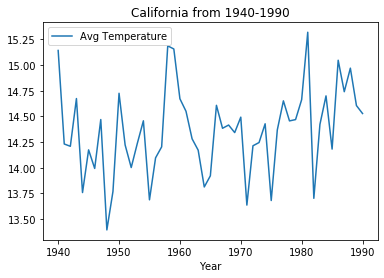

In [79]:
cali_avg.plot(kind = 'line', 
              y = 'Avg Temperature', 
              title = 'California from 1940-1990')
plt.ylabel('California Average Temperature')
plt.savefig('line/california.png')

In [55]:
#now kansas

kansas = state_df.loc[state_df['State'] == 'Kansas']
kansas.head()


,Date,Avg Temperature,State,Country,Year,Month
216164,1940-01-01,-9.797,Kansas,United States,1940,01
216165,1940-02-01,0.409,Kansas,United States,1940,02
216166,1940-03-01,6.510,Kansas,United States,1940,03
216167,1940-04-01,11.674,Kansas,United States,1940,04
216168,1940-05-01,17.311,Kansas,United States,1940,05


In [66]:
kansas_temp = kansas.groupby('Year').mean()
kansas_temp.head()

,Avg Temperature
Year,
1940,12.034417
1941,12.897667
1942,12.256333
1943,12.547833
1944,12.320417


NameError: name 'plt' is not defined

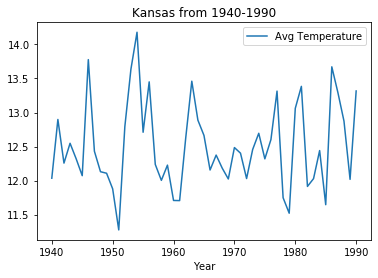

In [67]:
kansas_temp.plot(kind = 'line', 
                 y = 'Avg Temperature', 
                 title = 'Kansas from 1940-1990')
plt.ylabel('Kansas Avg Temp')
plt.savefig('line/kansas.png')

In [65]:
#Nebraska time
nebraska = state_df.loc[state_df['State'] == 'Nebraska']
nebraska.head()

,Date,Avg Temperature,State,Country,Year,Month
350041,1940-01-01,-11.871,Nebraska,United States,1940,01
350042,1940-02-01,-2.842,Nebraska,United States,1940,02
350043,1940-03-01,2.482,Nebraska,United States,1940,03
350044,1940-04-01,8.172,Nebraska,United States,1940,04
350045,1940-05-01,14.932,Nebraska,United States,1940,05


In [68]:
nebraska_temp = nebraska.groupby('Year').mean()
nebraska_temp.head()

,Avg Temperature
Year,
1940,9.396250
1941,10.051583
1942,9.248500
1943,9.603667
1944,9.008167


NameError: name 'plt' is not defined

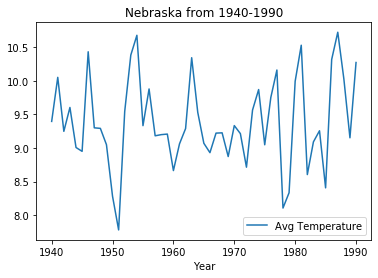

In [70]:
nebraska_temp.plot(kind = 'line', 
                   y = 'Avg Temperature', 
                   title = 'Nebraska from 1940-1990')
plt.ylabel('Nebraska Avg Temp.')
plt.savefig('line/nebraska.png')
plot.show

In [71]:
#Iowa's turn

iowa = state_df.loc[state_df['State'] == 'Iowa']
iowa.head()


,Date,Avg Temperature,State,Country,Year,Month
181921,1940-01-01,-13.568,Iowa,United States,1940,01
181922,1940-02-01,-4.764,Iowa,United States,1940,02
181923,1940-03-01,-0.587,Iowa,United States,1940,03
181924,1940-04-01,8.107,Iowa,United States,1940,04
181925,1940-05-01,14.420,Iowa,United States,1940,05


In [72]:
iowa_temp = iowa.groupby('Year').mean()
iowa_temp.head()

,Avg Temperature
Year,
1940,8.459083
1941,10.223167
1942,9.049500
1943,8.479250
1944,9.316000


NameError: name 'plt' is not defined

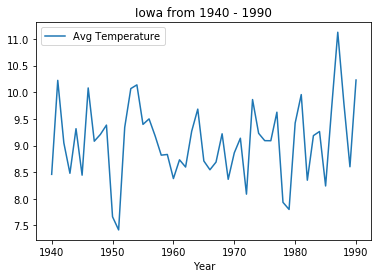

In [80]:
#plot
iowa_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Iowa from 1940 - 1990')
plt.ylabel('Iowa Avg Temp')
plt.savefig('line/iowa.png')

In [81]:
#Maryland
maryland = state_df.loc[state_df['State'] == 'Maryland']
maryland.head()



,Date,Avg Temperature,State,Country,Year,Month
301040,1940-01-01,-5.159,Maryland,United States,1940,01
301041,1940-02-01,1.410,Maryland,United States,1940,02
301042,1940-03-01,3.530,Maryland,United States,1940,03
301043,1940-04-01,8.833,Maryland,United States,1940,04
301044,1940-05-01,16.584,Maryland,United States,1940,05


In [83]:
maryland_temp = maryland.groupby('Year').mean()
maryland_temp.head()

,Avg Temperature
Year,
1940,11.261167
1941,12.749333
1942,12.629833
1943,12.415083
1944,12.474917


NameError: name 'plt' is not defined

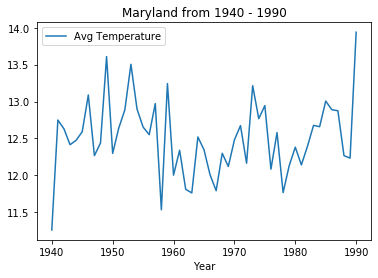

In [84]:
maryland_temp.plot(kind = 'line',
                  y = 'Avg Temperature',
                  title = 'Maryland from 1940 - 1990')
plt.ylabel('Maryland Avg Temp')
plt.savefig('line/maryland.png')

In [126]:
#wash

washington = state_df.loc[state_df['State'] == 'Washington']
washington.head()



,Date,Avg Temperature,State,Country,Year,Month
611664,1940-01-01,-0.664,Washington,United States,1940,01
611665,1940-02-01,2.002,Washington,United States,1940,02
611666,1940-03-01,5.909,Washington,United States,1940,03
611667,1940-04-01,8.376,Washington,United States,1940,04
611668,1940-05-01,13.004,Washington,United States,1940,05


In [127]:
wash_temp = washington.groupby('Year').mean()
wash_temp.head()

,Avg Temperature
Year,
1940,8.962083
1941,8.865917
1942,8.015083
1943,7.448000
1944,8.013333


NameError: name 'plt' is not defined

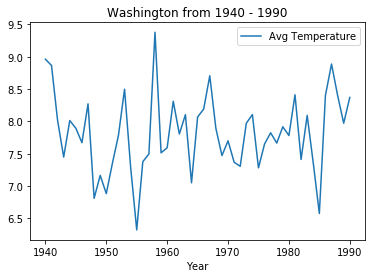

In [128]:
wash_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Washington from 1940 - 1990')
plt.savefig('line/washington.png')
plot.show()

In [129]:
#minny

minnesota = state_df.loc[state_df['State'] == 'Minnesota']
minnesota.head()


,Date,Avg Temperature,State,Country,Year,Month
319913,1940-01-01,-15.430,Minnesota,United States,1940,01
319914,1940-02-01,-8.646,Minnesota,United States,1940,02
319915,1940-03-01,-6.274,Minnesota,United States,1940,03
319916,1940-04-01,3.939,Minnesota,United States,1940,04
319917,1940-05-01,11.625,Minnesota,United States,1940,05


In [130]:
minn_temp = minnesota.groupby('Year').mean()
minn_temp.head()

,Avg Temperature
Year,
1940,4.779917
1941,6.199250
1942,5.326500
1943,4.391750
1944,5.755083


NameError: name 'plt' is not defined

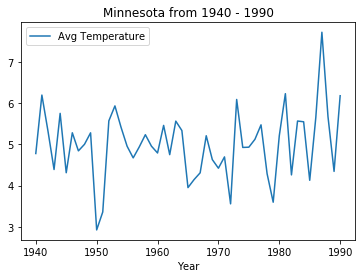

In [131]:
minn_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Minnesota from 1940 - 1990')
plt.savefig('line/minn.png')
plot.show()

In [132]:
#michigan

michigan = state_df.loc[state_df['State'] == 'Michigan']
michigan.head()

,Date,Avg Temperature,State,Country,Year,Month
314493,1940-01-01,-8.881,Michigan,United States,1940,01
314494,1940-02-01,-5.224,Michigan,United States,1940,02
314495,1940-03-01,-4.330,Michigan,United States,1940,03
314496,1940-04-01,3.571,Michigan,United States,1940,04
314497,1940-05-01,10.637,Michigan,United States,1940,05


In [133]:
mich_temp = michigan.groupby('Year').mean()
mich_temp.head()

,Avg Temperature
Year,
1940,6.293083
1941,7.908583
1942,7.108417
1943,6.183917
1944,7.464250


NameError: name 'plt' is not defined

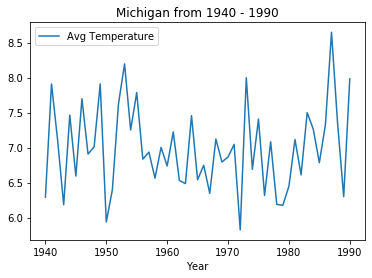

In [134]:
mich_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Michigan from 1940 - 1990')
plt.savefig('line/michigan.png')
plot.show()

In [135]:
#illinois

illinois = state_df.loc[state_df['State'] == 'Illinois']
illinois.head()

,Date,Avg Temperature,State,Country,Year,Month
172636,1940-01-01,-10.002,Illinois,United States,1940,01
172637,1940-02-01,-1.245,Illinois,United States,1940,02
172638,1940-03-01,2.694,Illinois,United States,1940,03
172639,1940-04-01,9.725,Illinois,United States,1940,04
172640,1940-05-01,15.007,Illinois,United States,1940,05


In [136]:
ill_temp = illinois.groupby('Year').mean()
ill_temp.head()

,Avg Temperature
Year,
1940,10.459000
1941,12.111500
1942,11.174917
1943,10.745167
1944,11.514083


NameError: name 'plt' is not defined

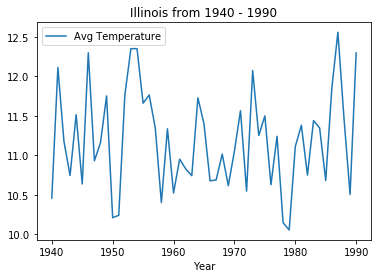

In [137]:
ill_temp.plot(kind = 'line',
             y = 'Avg Temperature',
             title = 'Illinois from 1940 - 1990')
plt.savefig('line/illinois.png')
plot.show()

In [138]:
#NC

north_carolina = state_df.loc[state_df['State'] == 'North Carolina']
north_carolina.head()


,Date,Avg Temperature,State,Country,Year,Month
387211,1940-01-01,-1.346,North Carolina,United States,1940,01
387212,1940-02-01,5.357,North Carolina,United States,1940,02
387213,1940-03-01,8.268,North Carolina,United States,1940,03
387214,1940-04-01,13.334,North Carolina,United States,1940,04
387215,1940-05-01,18.448,North Carolina,United States,1940,05


In [139]:
temp_north = north_carolina.groupby('Year').mean()
temp_north.head()

,Avg Temperature
Year,
1940,14.135833
1941,15.291500
1942,15.144583
1943,15.018500
1944,14.959333


NameError: name 'plt' is not defined

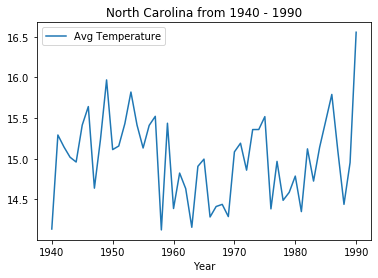

In [140]:
temp_north.plot(kind = 'line',
               y = 'Avg Temperature',
               title = 'North Carolina from 1940 - 1990')
plt.savefig('line/NC.png')
plot.show()

In [86]:
#bottom 5 states
#that parttake in factory farming the least in the USA
#New York, New Jersey, West Virginia, New Hampshire, Wymoing
#NY first

ny = state_df.loc[state_df['State'] == 'New York']
ny.head()




,Date,Avg Temperature,State,Country,Year,Month
375176,1940-01-01,-10.049,New York,United States,1940,01
375177,1940-02-01,-5.960,New York,United States,1940,02
375178,1940-03-01,-3.746,New York,United States,1940,03
375179,1940-04-01,4.131,New York,United States,1940,04
375180,1940-05-01,13.120,New York,United States,1940,05


In [89]:
ny_temp = ny.groupby('Year').mean()
ny_temp.head()

,Avg Temperature
Year,
1940,6.328667
1941,7.965833
1942,7.779083
1943,6.859167
1944,7.663250


NameError: name 'plt' is not defined

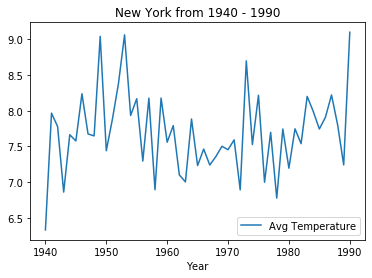

In [91]:
#plot
ny_temp.plot(kind = 'line',
            y = 'Avg Temperature',
            title = 'New York from 1940 - 1990')
plt.ylabel('NY Avg Temp')
plt.savefig('line/NY.png')

In [92]:
#New Jersey
nj = state_df.loc[state_df['State'] == 'New Jersey']
nj.head()

,Date,Avg Temperature,State,Country,Year,Month
367539,1940-01-01,-5.904,New Jersey,United States,1940,01
367540,1940-02-01,-0.569,New Jersey,United States,1940,02
367541,1940-03-01,1.059,New Jersey,United States,1940,03
367542,1940-04-01,7.044,New Jersey,United States,1940,04
367543,1940-05-01,15.014,New Jersey,United States,1940,05


In [93]:
nj_temp =nj.groupby('Year').mean()
nj_temp.head()

,Avg Temperature
Year,
1940,9.639917
1941,11.265083
1942,11.113750
1943,10.716500
1944,11.032583


NameError: name 'plt' is not defined

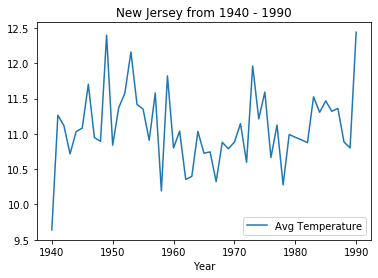

In [97]:
nj_temp.plot(kind = 'line',
            y = 'Avg Temperature',
            title = 'New Jersey from 1940 - 1990')
plt.ylabel('NJ Avg Temp')
plt.savefig('line/NJ.png')
plot.show()

In [99]:
#west virginia
west_virginia = state_df.loc[state_df['State'] == 'West Virginia']
west_virginia.head()

,Date,Avg Temperature,State,Country,Year,Month
617516,1940-01-01,-7.158,West Virginia,United States,1940,01
617517,1940-02-01,0.154,West Virginia,United States,1940,02
617518,1940-03-01,3.153,West Virginia,United States,1940,03
617519,1940-04-01,8.976,West Virginia,United States,1940,04
617520,1940-05-01,15.219,West Virginia,United States,1940,05


In [100]:
wv_temp = west_virginia.groupby('Year').mean()
wv_temp.head()

,Avg Temperature
Year,
1940,10.208917
1941,11.558667
1942,11.311917
1943,11.048750
1944,11.337083


NameError: name 'plt' is not defined

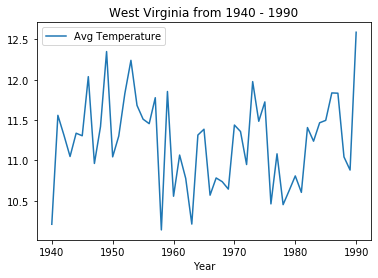

In [101]:
wv_temp.plot(kind = 'line',
            y = 'Avg Temperature',
            title = 'West Virginia from 1940 - 1990')
plt.ylabel('West Virginia Avg Temp')
plt.savefig('line/WV.png')
plot.show()

In [102]:
#new hampshire
new_hamps = state_df.loc[state_df['State'] == 'New Hampshire']
new_hamps.head()

,Date,Avg Temperature,State,Country,Year,Month
364300,1940-01-01,-11.238,New Hampshire,United States,1940,01
364301,1940-02-01,-7.191,New Hampshire,United States,1940,02
364302,1940-03-01,-4.004,New Hampshire,United States,1940,03
364303,1940-04-01,2.773,New Hampshire,United States,1940,04
364304,1940-05-01,11.819,New Hampshire,United States,1940,05


In [104]:
nh_temp = new_hamps.groupby('Year').mean()
nh_temp.head()

,Avg Temperature
Year,
1940,5.054167
1941,6.344917
1942,6.398250
1943,5.344250
1944,6.081833


NameError: name 'plt' is not defined

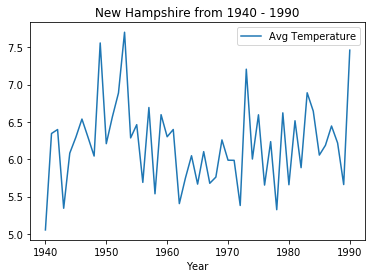

In [105]:
nh_temp.plot(kind = 'line',
            y = 'Avg Temperature',
            title = 'New Hampshire from 1940 - 1990')
plt.ylabel('New Hampshire Avg Temp')
plt.savefig('line/NH.png')
plot.show()

In [106]:
#wyoming
wyoming = state_df.loc[state_df['State'] == 'Wyoming']
wyoming.head()

,Date,Avg Temperature,State,Country,Year,Month
625555,1940-01-01,-9.355,Wyoming,United States,1940,01
625556,1940-02-01,-4.172,Wyoming,United States,1940,02
625557,1940-03-01,1.264,Wyoming,United States,1940,03
625558,1940-04-01,4.366,Wyoming,United States,1940,04
625559,1940-05-01,11.233,Wyoming,United States,1940,05


In [107]:
wyoming_temp = wyoming.groupby('Year').mean()
wyoming_temp.head()

,Avg Temperature
Year,
1940,6.176833
1941,5.606750
1942,4.811500
1943,5.706583
1944,4.508333


NameError: name 'plt' is not defined

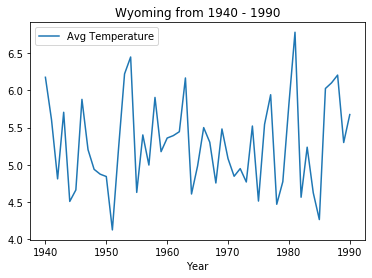

In [108]:
wyoming_temp.plot(kind = 'line',
                 y = 'Avg Temperature',
                 title = 'Wyoming from 1940 - 1990')
plt.ylabel('Wyoming Avg Temp')
plt.savefig('line/wyoming.png')
plot.show()

In [109]:
#north dak

north_dakota = state_df.loc[state_df['State'] == 'North Dakota']
north_dakota.head()

,Date,Avg Temperature,State,Country,Year,Month
390152,1940-01-01,-16.234,North Dakota,United States,1940,01
390153,1940-02-01,-9.649,North Dakota,United States,1940,02
390154,1940-03-01,-4.867,North Dakota,United States,1940,03
390155,1940-04-01,3.090,North Dakota,United States,1940,04
390156,1940-05-01,12.663,North Dakota,United States,1940,05


In [110]:
north_temp = north_dakota.groupby('Year').mean()
north_temp.head()

,Avg Temperature
Year,
1940,4.912750
1941,5.633500
1942,4.883167
1943,4.341917
1944,4.903250


NameError: name 'plt' is not defined

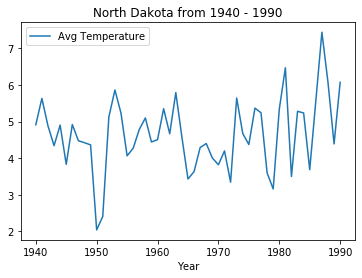

In [111]:
north_temp.plot(kind = 'line',
               y = 'Avg Temperature',
               title = 'North Dakota from 1940 - 1990')
plt.savefig('line/ND.png')
plot.show()

In [22]:
#Montana

montana = state_df.loc[state_df['State'] == 'Montana']
montana.head()

,Date,Avg Temperature,State,Country,Year,Month
331773,1940-01-01,-11.518,Montana,United States,1940,01
331774,1940-02-01,-5.881,Montana,United States,1940,02
331775,1940-03-01,0.617,Montana,United States,1940,03
331776,1940-04-01,3.897,Montana,United States,1940,04
331777,1940-05-01,12.370,Montana,United States,1940,05


In [23]:
montana_temp = montana.groupby('Year').mean()
montana_temp.head()

,Avg Temperature
Year,
1940,5.937667
1941,6.148333
1942,5.153750
1943,5.136583
1944,5.327417


FileNotFoundError: [Errno 2] No such file or directory: './graph/montanta.png'

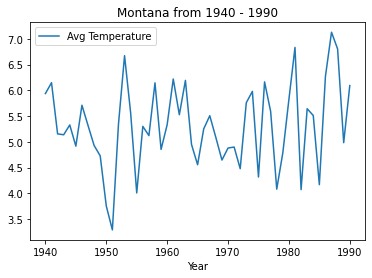

In [24]:
 ax = montana_temp.plot(kind = 'line',
                 y = 'Avg Temperature',
                 title = 'Montana from 1940 - 1990')
fig = ax.get_figure()
fig.savefig('./graph/montanta.png')
plot.show()

In [115]:
connecticut = state_df.loc[state_df['State'] == 'Connecticut']
connecticut.head()

,Date,Avg Temperature,State,Country,Year,Month
101283,1940-01-01,-6.279,Connecticut,United States,1940,01
101284,1940-02-01,-2.002,Connecticut,United States,1940,02
101285,1940-03-01,-0.687,Connecticut,United States,1940,03
101286,1940-04-01,5.368,Connecticut,United States,1940,04
101287,1940-05-01,13.011,Connecticut,United States,1940,05


In [117]:
conn_temp = connecticut.groupby('Year').mean()
conn_temp.head()

,Avg Temperature
Year,
1940,8.239000
1941,9.764250
1942,9.575917
1943,9.016583
1944,9.518833


NameError: name 'plt' is not defined

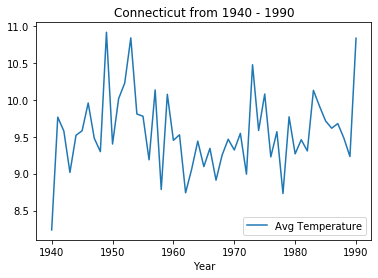

In [118]:
conn_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Connecticut from 1940 - 1990')
plt.savefig('line/conn.png')
plot.show()

In [120]:
massachusetts = state_df.loc[state_df['State'] == 'Massachusetts']
massachusetts.head()

,Date,Avg Temperature,State,Country,Year,Month
304279,1940-01-01,-8.243,Massachusetts,United States,1940,01
304280,1940-02-01,-4.078,Massachusetts,United States,1940,02
304281,1940-03-01,-1.930,Massachusetts,United States,1940,03
304282,1940-04-01,4.488,Massachusetts,United States,1940,04
304283,1940-05-01,12.609,Massachusetts,United States,1940,05


In [121]:
mass_temp = massachusetts.groupby('Year').mean()
mass_temp.head()

,Avg Temperature
Year,
1940,6.957083
1941,8.423583
1942,8.275750
1943,7.514250
1944,8.151583


NameError: name 'plt' is not defined

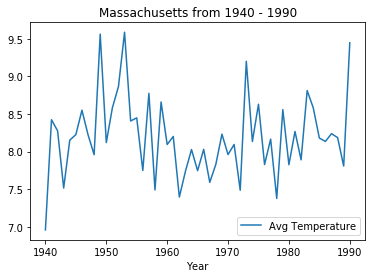

In [122]:
mass_temp.plot(kind = 'line',
              y = 'Avg Temperature',
              title = 'Massachusetts from 1940 - 1990')
plt.savefig('line/mass.png')
plot.show()

In [123]:
maine = state_df.loc[state_df['State'] == 'Maine']
maine.head()

,Date,Avg Temperature,State,Country,Year,Month
289250,1940-01-01,-11.832,Maine,United States,1940,01
289251,1940-02-01,-8.389,Maine,United States,1940,02
289252,1940-03-01,-4.492,Maine,United States,1940,03
289253,1940-04-01,1.935,Maine,United States,1940,04
289254,1940-05-01,10.607,Maine,United States,1940,05


In [124]:
maine_temp = maine.groupby('Year').mean()
maine_temp.head()

,Avg Temperature
Year,
1940,4.112500
1941,4.991750
1942,5.116917
1943,4.023833
1944,5.009500


NameError: name 'plt' is not defined

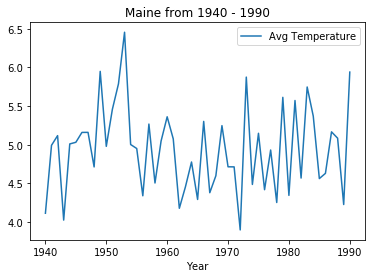

In [125]:
maine_temp.plot(kind = 'line',
               y = 'Avg Temperature',
               title = 'Maine from 1940 - 1990')
plt.savefig('line/maine.png')
plot.show()